
# Random Forest Project - Titanic Data

Data is available at (https://www.kaggle.com/datasets/brendan45774/test-file)



# Import Libraries

**Import the usual libraries for pandas and plotting.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read Titanic data as a dataframe called Data.**

In [2]:
Data = pd.read_csv('tested.csv')

** Check out the info(), head(), and describe() methods on Data.**

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

** Histogram of age distributions on top of each other, one for each class**

Text(0.5, 0, 'Age')

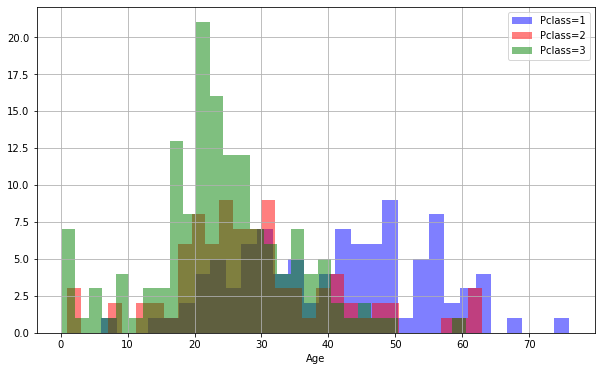

In [6]:
plt.figure(figsize=(10,6))
Data[Data['Pclass']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Pclass=1')
Data[Data['Pclass']==2]['Age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Pclass=2')
Data[Data['Pclass']==3]['Age'].hist(alpha=0.5,color='green',
                                              bins=30,label='Pclass=3')


plt.legend()
plt.xlabel('Age')

** Similar figure, by Survived column.**

Text(0.5, 0, 'Age')

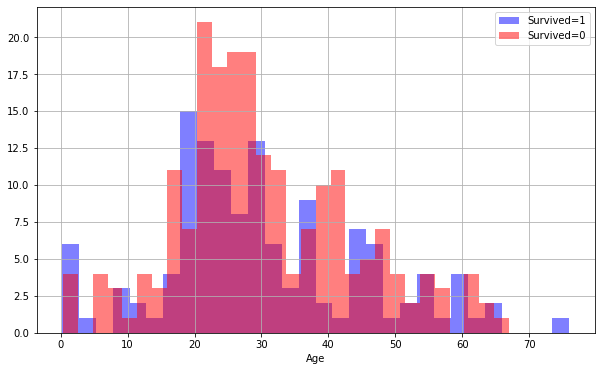

In [7]:
plt.figure(figsize=(10,6))
Data[Data['Survived']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Survived=1')
Data[Data['Survived']==0]['Age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Survived=0')
plt.legend()
plt.xlabel('Age')

** Countplot using seaborn showing the counts of Data by sex **

<AxesSubplot:xlabel='Sex', ylabel='count'>

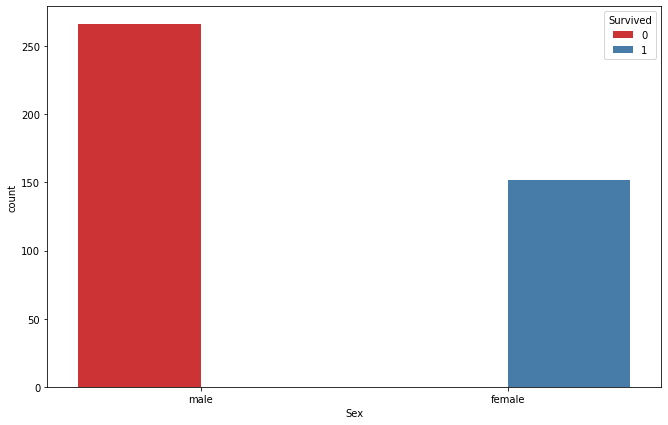

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='Sex',hue='Survived',data=Data,palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Categorical Features
 Making a dummy variable

In [10]:
cat_feats = ['Pclass', 'Sex']

In [11]:
final_data = pd.get_dummies(Data,columns=cat_feats,drop_first=True)

In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Pclass_2     418 non-null    uint8  
 11  Pclass_3     418 non-null    uint8  
 12  Sex_male     418 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(3)
memory usage: 34.0+ KB


Dropping some irrelavant categories from the final dataset

In [13]:
final_data = final_data.drop(['Name', 'PassengerId','Ticket','Embarked','Cabin'], axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       332 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Pclass_2  418 non-null    uint8  
 6   Pclass_3  418 non-null    uint8  
 7   Sex_male  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


Removing NA values

In [14]:
final_data = final_data.dropna()

## Train Test Split



In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_data.drop('Survived',axis=1)
y = final_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Importing DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [23]:
print(confusion_matrix(y_test,predictions))

[[60  0]
 [ 0 40]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=600)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [27]:
predictions = rfc.predict(X_test)

**A classification report from the results.**

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



**The Confusion Matrix for the predictions.**

In [30]:
print(confusion_matrix(y_test,predictions))

[[60  0]
 [ 0 40]]
